## Corpus Analysis

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

jeopardy_df = pd.read_csv('JEOPARDY_CSV.csv')
jeopardy_df = jeopardy_df.rename(columns={' Question': 'Question', ' Answer': 'Answer', ' Category': 'Category', " Air Date": "Air Date"})

# drop NaN values
print(jeopardy_df[jeopardy_df['Answer'].isnull()])
jeopardy_df.drop(jeopardy_df.index[[94817, 143297]], inplace=True)

# drop 
mask = jeopardy_df['Question'].str.contains("<")
jeopardy_df = jeopardy_df[~mask]


# combine ' Question' column and ' Answer' column
jeopardy_df['Document'] = jeopardy_df['Question'] + " " + jeopardy_df['Answer']

# change date to year only
jeopardy_df['Air Date'] = jeopardy_df['Air Date'].str[:4]


        Show Number    Air Date             Round                Category  \
94817          4346  2003-06-23         Jeopardy!           GOING "N"SANE   
143297         6177  2011-06-21  Double Jeopardy!                 NOTHING   
178922         4573  2004-06-23         Jeopardy!  MUCH ADO ABOUT NOTHING   

        Value                                           Question Answer  
94817    $200                       It often precedes "and void"    NaN  
143297   $400  This word for "nothing" precedes "and void" to...    NaN  
178922   $200  Completes the title of the 1939 book by Agatha...    NaN  


Number of documents: 206194
Number of questtions per year:
Air Date
1984     1154
1985      878
1986     1392
1987     1260
1988     1272
1989     2051
1990     4324
1991     1437
1992     1879
1993     2126
1994     1135
1995     1135
1996     4880
1997    13011
1998    12910
1999    13503
2000    13355
2001    11787
2002     6663
2003     9314
2004    12449
2005    12291
2006    12350
2007    12574
2008    12813
2009    12393
2010    12541
2011    12299
2012     1018
Name: count, dtype: int64
10 most common Answers
Answer
China         210
Australia     208
Japan         188
Chicago       187
France        187
India         179
California    178
Canada        173
Spain         168
Alaska        159
Name: count, dtype: int64


/var/folders/7c/7s4q9bpn7mgd2b242cy6g20r0000gn/T/ipykernel_7153/738227878.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Answer', data=jeopardy_df[mask], palette=sns.color_palette("Blues", 10), order=top10.index.tolist())


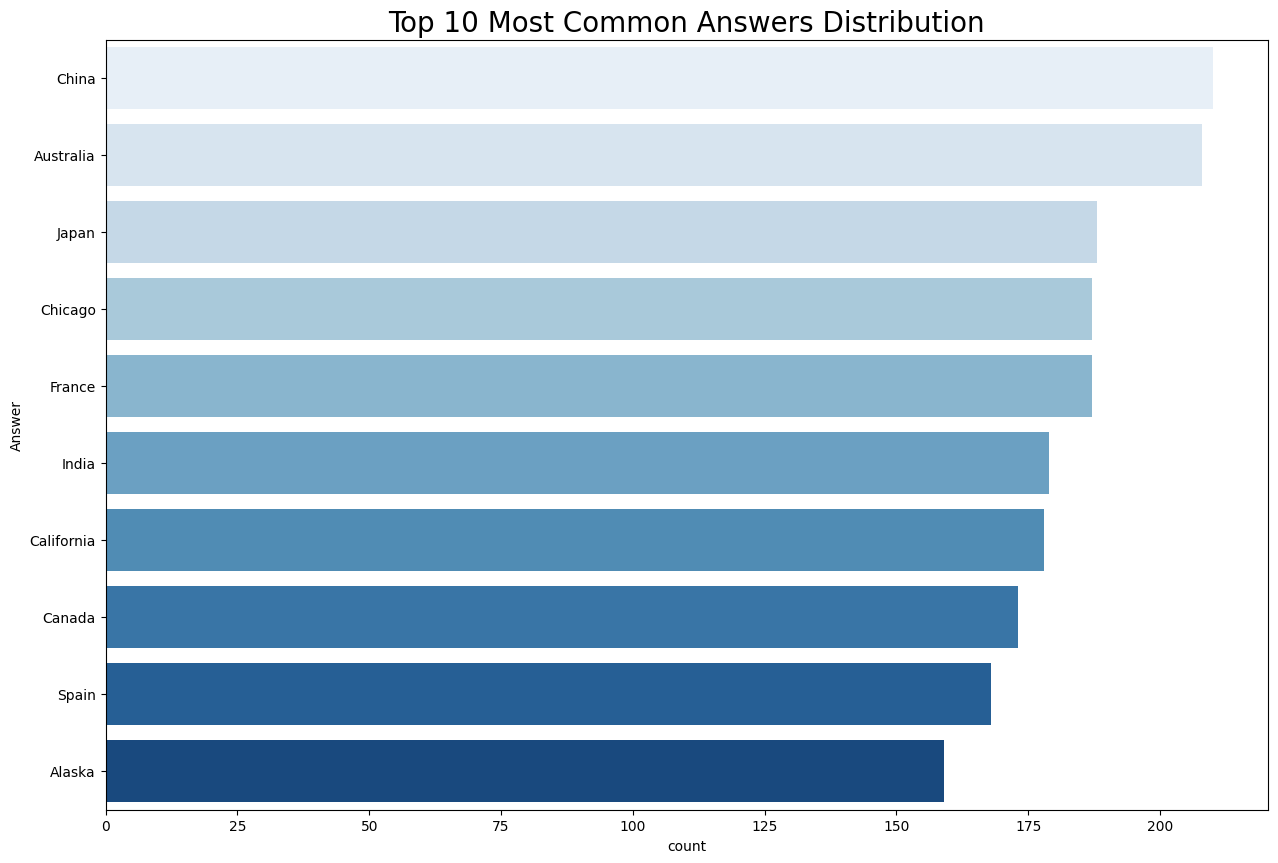

In [41]:
sample_df = jeopardy_df.sample(100)


# number of documents 
print("Number of documents:", len(jeopardy_df))

print("Number of questtions per year:")
print(jeopardy_df['Air Date'].value_counts().sort_index())

print("10 most common Answers")
top10 = jeopardy_df['Answer'].value_counts()[:10]
print(top10)

# Visualize top 10 Answers:
mask = jeopardy_df['Answer'].map(lambda x: x in top10.index.tolist())

sns.countplot(y='Answer', data=jeopardy_df[mask], palette=sns.color_palette("Blues", 10), order=top10.index.tolist())
plt.gcf().set_size_inches(15,10)
plt.title('Top 10 Most Common Answers Distribution', size=20)

plt.savefig("top10_answers.png")

Number of unique categories: 27331
10 most common cateogires
Category
BEFORE & AFTER             545
LITERATURE                 490
SCIENCE                    476
AMERICAN HISTORY           413
POTPOURRI                  383
WORLD HISTORY              374
WORD ORIGINS               365
COLLEGES & UNIVERSITIES    348
HISTORY                    347
SPORTS                     340
Name: count, dtype: int64
Question
Hainan                4
Greenland             4
Abigail Smith         4
Iron pyrite           3
"You Must Love Me"    3
Walk like a duck      3
Argentina             3
Thomas Jefferson      3
Egypt                 3
Kate Hudson           3
Name: count, dtype: int64


/var/folders/7c/7s4q9bpn7mgd2b242cy6g20r0000gn/T/ipykernel_7153/2092244363.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=jeopardy_df[mask_c], palette=sns.color_palette("Blues", 10), order=top10_c.index.tolist())


10 most common questions
Question
Hainan                4
Greenland             4
Abigail Smith         4
Iron pyrite           3
"You Must Love Me"    3
Walk like a duck      3
Argentina             3
Thomas Jefferson      3
Egypt                 3
Kate Hudson           3
Name: count, dtype: int64


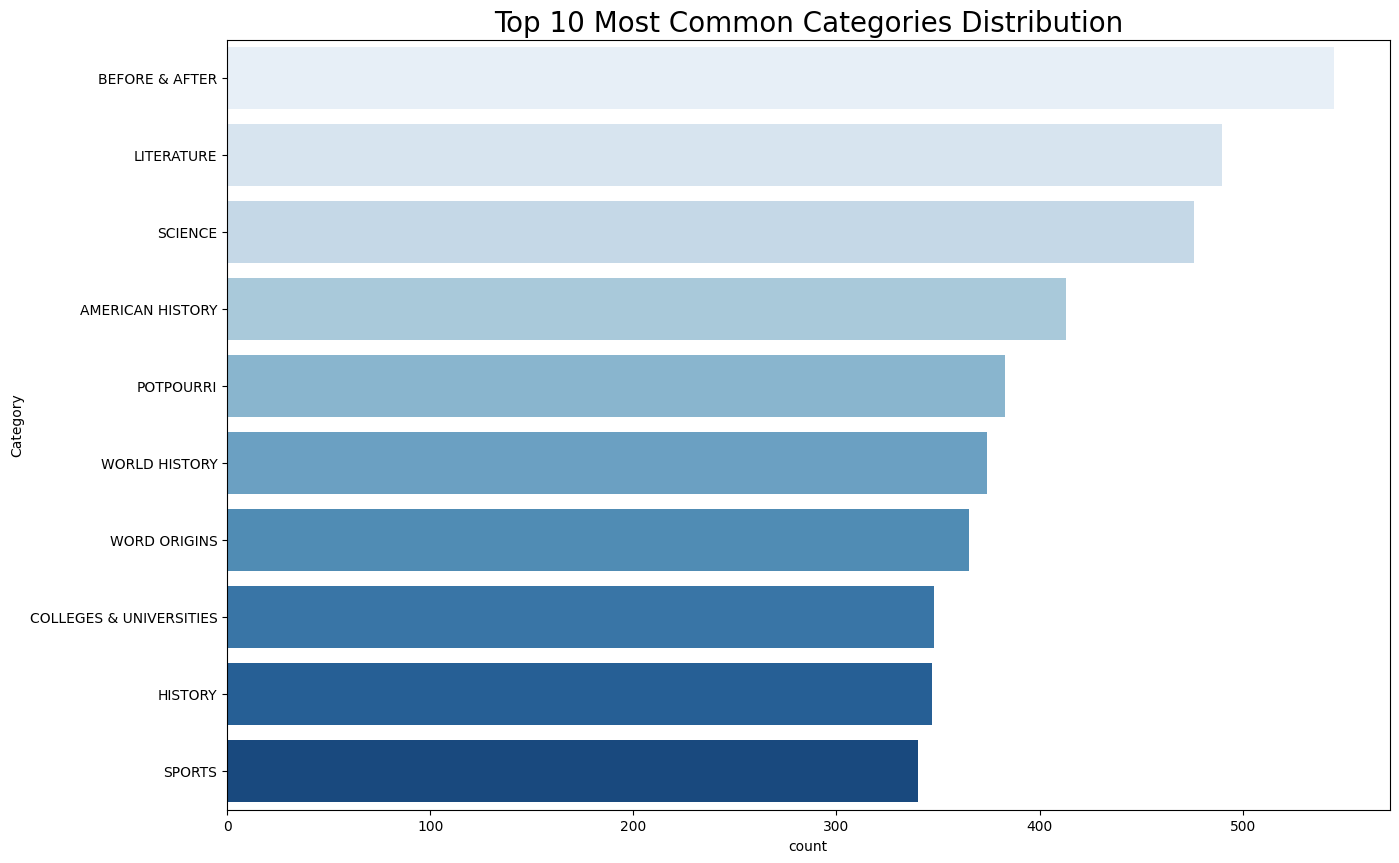

In [42]:
print("Number of unique categories:", len(jeopardy_df['Category'].unique()))

print("10 most common cateogires")
top10_c= jeopardy_df['Category'].value_counts()[:10]
print(top10_c)


mask1 = jeopardy_df[jeopardy_df['Question'] == ('[audio clue]')]
mask2 = jeopardy_df[jeopardy_df['Question'] == ('[video clue]')]
mask3 = jeopardy_df[jeopardy_df['Question'] == ('[filler]')]
mask4 = jeopardy_df[jeopardy_df['Question'] == ('(audio clue)')]

jeopardy_df.drop(mask1.index, inplace = True) 
jeopardy_df.drop(mask2.index, inplace = True)
jeopardy_df.drop(mask3.index, inplace = True)
jeopardy_df.drop(mask4.index, inplace = True)
jeopardy_df.shape

print(jeopardy_df['Question'].value_counts()[:10])

# Visualize top 10 common categories
mask_c = jeopardy_df['Category'].map(lambda x: x in top10_c.index.tolist())

sns.countplot(y='Category', data=jeopardy_df[mask_c], palette=sns.color_palette("Blues", 10), order=top10_c.index.tolist())
plt.gcf().set_size_inches(15,10)
plt.title('Top 10 Most Common Categories Distribution', size=20)
plt.savefig("top10_categories.png")

print("10 most common questions")
print(jeopardy_df['Question'].value_counts()[:10])

## Modeling NER

In [43]:
!python -m spacy download en_core_web_lg

^C

Aborted!


In [ ]:
import spacy
nlp_web = spacy.load("en_core_web_lg")

ner_results = []

for document in jeopardy_df['Document']:
    text = str(document)
    doc_web = nlp_web(text)
    ner_results.append(doc_web.ents)

jeopardy_df['ner_results'] = ner_results

In [ ]:
display(jeopardy_df['ner_results'])

0          ((the, last, 8, years), (Galileo), (Copernicus))
1         ((2), (1912), (Carlisle, Indian, School), (6),...
2         ((Yuma), (4,055, hours), (each, year), (Arizona))
3         ((1963), (The, Art, Linkletter, Show), (billio...
4         ((Indep), (Constitution), (Mass.), (second), (...
                                ...                        
216925                         ((Puccini), (3), (Turandot))
216926                        ((North, America), (only, 4))
216927       ((Penny, Lane), (Hellraiser), (Clive, Barker))
216928             ((Sill), (Okla.), (Arizona), (Geronimo))
216929                                ((18th), (Catherine))
Name: ner_results, Length: 206153, dtype: object

In [ ]:
# What is the average number of entities per document?
avg_ent_doc = jeopardy_df['ner_results'].apply(len).mean()
print("The average number of entities per document is", avg_ent_doc)


# What is the average number of entities of each type per document?
ent_type_counts = {}
total_doc = len(jeopardy_df)

# Iterate ner_results column to count entity types
for ner_result in jeopardy_df['ner_results']:
    for ent in ner_result:
        ent_type_counts[ent.label_] = ent_type_counts.get(ent.label_, 0) + 1

# Calculate the average
avg_ent_type_per_doc = {}
for ent_type, count in ent_type_counts.items():
    avg_ent_type_per_doc[ent_type] = count / total_doc

print("Average number of entities of each type per document:")
print(avg_ent_type_per_doc)

The average number of entities per document is 2.524634616037603
Average number of entities of each type per document:
{'DATE': 0.3374872061042042, 'PRODUCT': 0.029031835578429612, 'ORG': 0.3249091694033073, 'CARDINAL': 0.18874816277230988, 'PERSON': 0.6679068458863078, 'GPE': 0.3624589503912143, 'TIME': 0.009235858803898076, 'WORK_OF_ART': 0.2030627737651162, 'LAW': 0.005253379771334882, 'ORDINAL': 0.06686296100469069, 'QUANTITY': 0.02283255640228374, 'FAC': 0.035628877581213955, 'LOC': 0.06585885240573748, 'NORP': 0.15857639714192856, 'EVENT': 0.024253830892589485, 'PERCENT': 0.004181360445882427, 'MONEY': 0.00968698005850024, 'LANGUAGE': 0.008658617628654447}


In [ ]:
import heapq
# What is the most common span for each entity type?

# Initialize a dictionary to store spans for each entity type
ent_type_spans = {}

# Iterate over the 'ner_results' column
mask = jeopardy_df['Air Date'] == "2012"
year = jeopardy_df[mask]
display(year)


for ner_result in jeopardy_df['ner_results']:
    for ent in ner_result:
        ent_type = ent.label_
        span_text = ent.text

        if ent_type not in ent_type_spans:
            ent_type_spans[ent_type] = {}
        
        ent_type_spans[ent_type][span_text] = ent_type_spans[ent_type].get(span_text, 0) + 1

# most common span per type
max_span_per_type = {}

# for ent_type, span_text in ent_type_spans.items():
#     max_span = max(span_text, key = span_text.get)
#     max_span_per_type[ent_type] = max_span

# max_spans_per_type = {}

for ent_type, span_text in ent_type_spans.items():
    top_spans = heapq.nlargest(10, span_text.items(), key=lambda x: x[1])
    max_span_per_type[ent_type] = dict(top_spans)

print('Most common span for each entity type:')
for ent_type in max_span_per_type:
    print(ent_type, ":", max_span_per_type[ent_type])

ent_type_spans

,Show Number,Air Date,Round,Category,Value,Question,Answer,Document,ner_results
1915,6294,2012,Jeopardy!,"A SHAKESPEARE PLAY, FOR OPENERS",$200,This play opens on the battlements of the cast...,Hamlet,This play opens on the battlements of the cast...,"((Barnardo), (Hamlet))"
1916,6294,2012,Jeopardy!,THAT'S BUSINESS,$200,He started a book business from his home in 18...,(Charles M.) Barnes,He started a book business from his home in 18...,"((1873), (William), (G., Clifford, Noble), (19..."
1917,6294,2012,Jeopardy!,NURSERY RHYMES,$200,"Peter, Peter was an eater of this; he kept his...",pumpkin,"Peter, Peter was an eater of this; he kept his...","((Peter), (Peter))"
1918,6294,2012,Jeopardy!,INLETS,$200,This largest Alaskan city lies at the head of ...,Anchorage,This largest Alaskan city lies at the head of ...,"((Alaskan), (the, Kenai, peninsula), (Anchorage))"
1919,6294,2012,Jeopardy!,"THE EVOLUTION OF ""M""USIC",$200,"This '60s ""Nights in White Satin"" band has ano...",Moody Blues,"This '60s ""Nights in White Satin"" band has ano...","((This, ', 60s), (Nights, in, White, Satin), (..."
...,...,...,...,...,...,...,...,...,...
192273,6292,2012,Double Jeopardy!,I PLAYED A DOCTOR & SOME OTHER GUY ON TV,$2000,"Marcus Welby & Jim Anderson (the ""Father"" who ...",Robert Young,"Marcus Welby & Jim Anderson (the ""Father"" who ...","((Marcus, Welby), (Jim, Anderson), (Knows, Bes..."
192274,6292,2012,Double Jeopardy!,CLASSICAL MUSIC,$2000,This composer of Armenian heritage is best kno...,(Aram) Khachaturian,This composer of Armenian heritage is best kno...,"((Armenian), (Sabre, Dance), (Gayane), (Aram))"
192275,6292,2012,Double Jeopardy!,POSSESSIVE BOOK TITLES,$2000,"Kim Edwards: ""The ____ ____'s Daughter"" (2005)",The Memory Keeper's Daughter,"Kim Edwards: ""The ____ ____'s Daughter"" (2005)...","((Kim, Edwards), (2005), (The, Memory, Keeper,..."
192276,6292,2012,Double Jeopardy!,"""TRI"" TIPS",$2000,This was an ancient Roman warship with multipl...,a trireme,This was an ancient Roman warship with multipl...,"((Roman), (trireme))"


Most common span for each entity type:
DATE : {'1996': 700, '1997': 652, '1999': 650, '1998': 625, '1995': 558, '2000': 517, '1984': 515, '1992': 502, '1994': 501, '1989': 484}
PRODUCT : {'Galileo': 103, 'Saturn': 45, 'Comet': 42, 'Cherokee': 37, 'Grammy': 37, 'Magellan': 32, 'Discovery': 31, 'Crown': 29, 'Atlantis': 29, 'Apache': 28}
ORG : {'Congress': 373, 'Senate': 279, 'NBA': 278, 'House': 267, 'NFL': 256, 'Lincoln': 219, 'U.N.': 211, 'Disney': 207, 'State': 190, 'Genesis': 179}
CARDINAL : {'one': 5524, '2': 5382, '3': 2687, '1': 1828, '4': 1684, 'One': 1491, '5': 1141, '6': 828, '7': 768, '10': 643}
PERSON : {'Shakespeare': 431, 'Oscar': 411, 'John': 346, 'Sarah': 249, 'Jesus': 237, 'Mary': 216, 'Elizabeth': 212, 'David': 196, 'Jr.': 192, 'Paul': 173}
GPE : {'U.S.': 4009, 'California': 943, 'France': 893, 'England': 817, 'Washington': 757, 'Texas': 688, 'London': 685, 'New York': 651, 'Paris': 651, 'India': 587}
TIME : {'night': 84, 'the night': 66, 'morning': 50, 'tonight': 45, '

{'DATE': {'the last 8 years': 1,
  '1912': 192,
  'each year': 44,
  '1963': 332,
  'today': 439,
  'the winter of 1971-72': 1,
  'June 28, 1994': 1,
  '1960': 321,
  '1889': 123,
  'the 1920s': 132,
  "'27 & '36": 1,
  '1935': 215,
  '1898': 113,
  '1939': 251,
  '1885': 76,
  "the late '70s": 7,
  '1954-1955': 1,
  '2003': 417,
  '2001': 436,
  '2004': 414,
  '1553': 4,
  '1559': 5,
  '1979': 344,
  '1961': 322,
  '1797': 29,
  'the day': 140,
  "the previous season's": 1,
  '1930s': 111,
  '2009': 345,
  'Jan. 12, 2010': 1,
  '2010': 229,
  '1977': 338,
  '11-year-old': 18,
  '1751': 10,
  'January 2010': 1,
  'every 2 years': 4,
  '1999': 650,
  '1967': 356,
  '17': 15,
  "The 19th century's": 1,
  '1985': 379,
  '15th century': 15,
  '1554': 7,
  'some 200 years': 1,
  '15-year': 6,
  '20 years': 59,
  '1962': 366,
  '1862': 89,
  '1904': 129,
  '1801': 22,
  '1965': 334,
  '1941': 193,
  'October 8, 1871': 1,
  '1806': 45,
  'the 1990s': 58,
  'January 1999': 10,
  '1996': 700,
 

In [47]:
# 2006 - 2012
mask = jeopardy_df['Air Date'] > "2005"
year = jeopardy_df[mask]
display(year)

ner_results = []

for q in year['Question']:
    text = str(q)
    doc_web = nlp_web(text)
    ner_results.append(doc_web.ents)

year['ner_results'] = ner_results


for ner_result in year['ner_results']:
    for ent in ner_result:
        ent_type = ent.label_
        span_text = ent.text

        if ent_type not in ent_type_spans:
            ent_type_spans[ent_type] = {}
        
        ent_type_spans[ent_type][span_text] = ent_type_spans[ent_type].get(span_text, 0) + 1

# most common span per type
max_span_per_type = {}

for ent_type, span_text in ent_type_spans.items():
    top_spans = heapq.nlargest(10, span_text.items(), key=lambda x: x[1])
    max_span_per_type[ent_type] = dict(top_spans)

print('Most common span for each entity type:')
for ent_type in max_span_per_type:
    print(ent_type, ":", max_span_per_type[ent_type])

ent_type_spans

,Show Number,Air Date,Round,Category,Value,Question,Answer,Document
56,5957,2010,Jeopardy!,"GEOGRAPHY ""E""",$200,It's the largest kingdom in the United Kingdom,England,It's the largest kingdom in the United Kingdom...
57,5957,2010,Jeopardy!,RADIO DISNEY,$200,"""Party In The U.S.A."" is by this singer who al...",Miley Cyrus,"""Party In The U.S.A."" is by this singer who al..."
58,5957,2010,Jeopardy!,PARTS OF PEACH,$200,"If this part of a peach is downy or fuzzy, the...",the skin,"If this part of a peach is downy or fuzzy, the..."
59,5957,2010,Jeopardy!,BE FRUITFUL & MULTIPLY,$200,4 x 12,48,4 x 12 48
60,5957,2010,Jeopardy!,LET'S BOUNCE,$200,This verb for bouncing a basketball sounds lik...,dribbling,This verb for bouncing a basketball sounds lik...
...,...,...,...,...,...,...,...,...
216925,4999,2006,Double Jeopardy!,RIDDLE ME THIS,$2000,This Puccini opera turns on the solution to 3 ...,Turandot,This Puccini opera turns on the solution to 3 ...
216926,4999,2006,Double Jeopardy!,"""T"" BIRDS",$2000,In North America this term is properly applied...,a titmouse,In North America this term is properly applied...
216927,4999,2006,Double Jeopardy!,AUTHORS IN THEIR YOUTH,$2000,"In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker,"In Penny Lane, where this ""Hellraiser"" grew up..."
216928,4999,2006,Double Jeopardy!,QUOTATIONS,$2000,"From Ft. Sill, Okla. he made the plea, Arizona...",Geronimo,"From Ft. Sill, Okla. he made the plea, Arizona..."


/var/folders/7c/7s4q9bpn7mgd2b242cy6g20r0000gn/T/ipykernel_7153/1414724372.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year['ner_results'] = ner_results


Most common span for each entity type:
GPE : {'U.S.': 1347, 'France': 255, 'California': 253, 'England': 214, 'NYC': 201, 'B.C.': 197, 'Texas': 194, 'London': 192, 'New York': 165, 'Paris': 165}
WORK_OF_ART : {'Oscar': 114, 'Bible': 89, 'Jeopardy': 52, 'Emmy': 52, 'Pulitzer': 42, 'Love': 39, 'Pulitzer Prize': 33, 'Nobel Prize': 32, 'Hamlet': 25, 'American Idol': 22}
PERSON : {'Shakespeare': 161, 'Oscar': 154, 'Jesus': 97, 'John': 64, 'Dickens': 57, 'Elvis': 52, 'Moses': 49, 'David': 47, 'Elizabeth': 46, 'Paul': 45}
CARDINAL : {'one': 2211, '2': 2200, '3': 1068, '4': 712, 'One': 582, '1': 538, '5': 458, '6': 356, '7': 335, '10': 260}
ORG : {'Congress': 119, 'NFL': 105, 'NBA': 103, 'Senate': 95, 'House': 67, 'Genesis': 67, 'State': 67, 'Disney': 64, 'U.N.': 61, 'Times': 60}
PERCENT : {'80%': 10, '50%': 10, '100%': 10, '25%': 8, '90%': 8, '40%': 7, '2%': 6, '10%': 5, '30%': 5, '75%': 5}
LOC : {'Earth': 195, 'Europe': 137, 'Africa': 116, 'Asia': 80, 'Pacific': 61, 'Mediterranean': 61, 'Car

{'GPE': {'the United Kingdom': 3,
  'U.S.': 1347,
  'Park View': 1,
  'Chula Vista': 1,
  'California': 253,
  'Taipei': 9,
  'Scotland': 58,
  "New Zealand's": 11,
  'Piha Beach': 1,
  'Clark County': 2,
  'Nevada': 42,
  'Philadelphia': 40,
  'Switzerland': 41,
  'Colorado': 44,
  'Virginia': 127,
  'Kent': 5,
  'England': 214,
  'Washington': 157,
  'D.C.': 92,
  'Texas': 194,
  'Vicksburg': 2,
  'USA': 161,
  'Atlanta': 47,
  'Ljubljana': 4,
  'Bratislava': 3,
  'Barcelona': 12,
  'Winthrop': 1,
  'Mass.': 46,
  'Istanbul': 10,
  'Ottawa': 11,
  'Amman': 4,
  'Sofia': 6,
  'Sarajevo': 2,
  'Saigon': 5,
  'Bucharest': 10,
  'Bonn': 7,
  'Bern': 6,
  'Belize City': 3,
  'Guatemala City': 3,
  'Panama City': 2,
  'Plymouth': 6,
  'Baylor': 2,
  'Marseilles': 4,
  'Antioch': 2,
  'Bowling Green': 1,
  'Mooresville': 1,
  'New York': 165,
  'the New Republic': 1,
  'Columbus': 52,
  'Cochise': 2,
  'Fort Sill': 4,
  'Illinois': 67,
  'Bell': 1,
  'Calif.': 34,
  'Harlem': 2,
  'Bogota':

In [48]:
# 1999 - 2005
mask = (jeopardy_df['Air Date'] > "1998") & (jeopardy_df['Air Date'] < "2006")
year = jeopardy_df[mask]
display(year)

ner_results = []

for q in year['Question']:
    text = str(q)
    doc_web = nlp_web(text)
    ner_results.append(doc_web.ents)

year['ner_results'] = ner_results


for ner_result in year['ner_results']:
    for ent in ner_result:
        ent_type = ent.label_
        span_text = ent.text

        if ent_type not in ent_type_spans:
            ent_type_spans[ent_type] = {}
        
        ent_type_spans[ent_type][span_text] = ent_type_spans[ent_type].get(span_text, 0) + 1

# most common span per type
max_span_per_type = {}

for ent_type, span_text in ent_type_spans.items():
    top_spans = heapq.nlargest(10, span_text.items(), key=lambda x: x[1])
    max_span_per_type[ent_type] = dict(top_spans)

print('Most common span for each entity type:')
for ent_type in max_span_per_type:
    print(ent_type, ":", max_span_per_type[ent_type])

ent_type_spans


,Show Number,Air Date,Round,Category,Value,Question,Answer,Document
0,4680,2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,"For the last 8 years of his life, Galileo was ..."
1,4680,2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,No. 2: 1912 Olympian; football star at Carlisl...
2,4680,2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,The city of Yuma in this state has a record av...
3,4680,2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,"In 1963, live on ""The Art Linkletter Show"", th..."
4,4680,2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,"Signer of the Dec. of Indep., framer of the Co..."
...,...,...,...,...,...,...,...,...
216682,3940,2001,Double Jeopardy!,I'M IN CHARGE!,$1000,In southeast Asia: President Gloria Macapagal-...,the Philippines,In southeast Asia: President Gloria Macapagal-...
216683,3940,2001,Double Jeopardy!,THE ANIMAL KINGDOM,$1000,Put on some soft howling music during this sea...,winter,Put on some soft howling music during this sea...
216684,3940,2001,Double Jeopardy!,TAXI,$1000,This actress who played a cabbie had romances ...,Marilu Henner,This actress who played a cabbie had romances ...
216685,3940,2001,Double Jeopardy!,"""CAB""",$1000,"It's a type of VW, or a light, 2-wheeled, one-...",Cabriolet,"It's a type of VW, or a light, 2-wheeled, one-..."


/var/folders/7c/7s4q9bpn7mgd2b242cy6g20r0000gn/T/ipykernel_7153/104578104.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year['ner_results'] = ner_results


Most common span for each entity type:
GPE : {'U.S.': 2838, 'California': 556, 'France': 536, 'England': 505, 'London': 410, 'Texas': 381, 'B.C.': 381, 'New York': 377, 'America': 372, 'Washington': 371}
WORK_OF_ART : {'Oscar': 269, 'Bible': 182, 'Emmy': 90, 'Jeopardy': 87, 'Love': 78, 'Pulitzer Prize': 75, 'Nobel Prize': 69, 'Pulitzer': 63, 'Hamlet': 59, 'Superman': 41}
PERSON : {'Oscar': 330, 'Shakespeare': 318, 'Sarah': 221, 'Jesus': 171, 'Cheryl': 153, 'John': 151, 'Dickens': 132, 'Elvis': 109, 'Tony': 99, 'Moses': 96}
CARDINAL : {'one': 4532, '2': 4123, '3': 2048, '4': 1287, '1': 1218, 'One': 1173, '5': 889, '6': 684, '7': 584, '10': 474}
ORG : {'Congress': 263, 'NFL': 217, 'NBA': 216, 'Senate': 181, 'Disney': 165, 'House': 163, 'U.N.': 154, 'Genesis': 135, 'State': 123, 'Lincoln': 112}
PERCENT : {'50%': 17, '100%': 16, '90%': 16, '80%': 15, '40%': 13, '25%': 11, '30%': 10, 'about 50%': 10, '10%': 9, 'about 70%': 8}
LOC : {'Earth': 449, 'Europe': 288, 'Africa': 250, 'Asia': 155, '

{'GPE': {'the United Kingdom': 7,
  'U.S.': 2838,
  'Park View': 1,
  'Chula Vista': 1,
  'California': 556,
  'Taipei': 12,
  'Scotland': 131,
  "New Zealand's": 19,
  'Piha Beach': 1,
  'Clark County': 2,
  'Nevada': 74,
  'Philadelphia': 99,
  'Switzerland': 81,
  'Colorado': 119,
  'Virginia': 248,
  'Kent': 8,
  'England': 505,
  'Washington': 371,
  'D.C.': 215,
  'Texas': 381,
  'Vicksburg': 5,
  'USA': 326,
  'Atlanta': 96,
  'Ljubljana': 4,
  'Bratislava': 4,
  'Barcelona': 27,
  'Winthrop': 1,
  'Mass.': 78,
  'Istanbul': 18,
  'Ottawa': 16,
  'Amman': 7,
  'Sofia': 27,
  'Sarajevo': 4,
  'Saigon': 10,
  'Bucharest': 16,
  'Bonn': 11,
  'Bern': 10,
  'Belize City': 6,
  'Guatemala City': 5,
  'Panama City': 4,
  'Plymouth': 19,
  'Baylor': 2,
  'Marseilles': 6,
  'Antioch': 4,
  'Bowling Green': 1,
  'Mooresville': 1,
  'New York': 377,
  'the New Republic': 1,
  'Columbus': 104,
  'Cochise': 2,
  'Fort Sill': 5,
  'Illinois': 163,
  'Bell': 1,
  'Calif.': 56,
  'Harlem': 4,


In [50]:
# 1992 - 1998
mask = (jeopardy_df['Air Date'] > "1991") & (jeopardy_df['Air Date'] < "1999")
year = jeopardy_df[mask]
display(year)

ner_results = []

for q in year['Question']:
    text = str(q)
    doc_web = nlp_web(text)
    ner_results.append(doc_web.ents)

year['ner_results'] = ner_results


for ner_result in year['ner_results']:
    for ent in ner_result:
        ent_type = ent.label_
        span_text = ent.text

        if ent_type not in ent_type_spans:
            ent_type_spans[ent_type] = {}
        
        ent_type_spans[ent_type][span_text] = ent_type_spans[ent_type].get(span_text, 0) + 1

# most common span per type
max_span_per_type = {}

for ent_type, span_text in ent_type_spans.items():
    top_spans = heapq.nlargest(10, span_text.items(), key=lambda x: x[1])
    max_span_per_type[ent_type] = dict(top_spans)

print('Most common span for each entity type:')
for ent_type in max_span_per_type:
    print(ent_type, ":", max_span_per_type[ent_type])

ent_type_spans


,Show Number,Air Date,Round,Category,Value,Question,Answer,Document
358,2825,1996,Jeopardy!,AMERICAN EXPLORERS,$100,Edward Beale brought news of this 1848 discove...,gold,Edward Beale brought news of this 1848 discove...
359,2825,1996,Jeopardy!,MEASURING DEVICES,$100,The amount of this in a solution can be measur...,sugar,The amount of this in a solution can be measur...
360,2825,1996,Jeopardy!,MYTHOLOGY,$100,Daedalus used this substance to fasten the win...,wax,Daedalus used this substance to fasten the win...
361,2825,1996,Jeopardy!,TELEVISION,$100,"This Sunday night series is subtitled ""The New...",Lois & Clark,"This Sunday night series is subtitled ""The New..."
362,2825,1996,Jeopardy!,ANNUAL EVENTS,$100,This state's Days of '47 Festival honors the d...,Utah,This state's Days of '47 Festival honors the d...
...,...,...,...,...,...,...,...,...
216624,2046,1993,Double Jeopardy!,BIBLICAL PEOPLE,$1000,"The original name of this man, thrown in the f...",Abednego,"The original name of this man, thrown in the f..."
216625,2046,1993,Double Jeopardy!,AWARDS,$1000,"In 1962 this ""Father of the Hydrogen Bomb"" was...",Edward Teller,"In 1962 this ""Father of the Hydrogen Bomb"" was..."
216626,2046,1993,Double Jeopardy!,WORLD GEOGRAPHY,$1000,"Denmark's highest point, Yding Skovhoj, rises ...",Jutland,"Denmark's highest point, Yding Skovhoj, rises ..."
216627,2046,1993,Double Jeopardy!,POETS & POETRY,$500,"Before he died this poet requested that ""Cross...",Tennyson,"Before he died this poet requested that ""Cross..."


/var/folders/7c/7s4q9bpn7mgd2b242cy6g20r0000gn/T/ipykernel_7153/2021867879.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year['ner_results'] = ner_results


Most common span for each entity type:
PERSON : {'Oscar': 77, 'Jesus': 59, 'Shakespeare': 55, 'Clinton': 39, 'Mary': 33, 'John': 31, 'Tom': 30, 'George': 28, 'Elizabeth': 26, 'David': 25}
GPE : {'U.S.': 779, 'England': 172, 'California': 149, 'France': 118, 'London': 116, 'New York': 109, 'America': 106, 'Washington': 95, 'Florida': 91, 'Texas': 91}
LOC : {'Earth': 113, 'Europe': 81, 'Africa': 55, 'Pacific': 44, 'Atlantic': 41, 'Mediterranean': 37, 'South America': 30, 'New England': 29, 'Caribbean': 27, 'Asia': 25}
PRODUCT : {'Crown': 7, 'Grammy': 7, 'Cherokee': 6, 'Apache': 5, 'Galileo': 5, 'Endeavour': 4, 'Trojan': 4, 'Cosmos': 3, 'Vega': 3, 'Discovery': 3}
DATE : {'1996': 382, '1997': 276, '1995': 223, '1992': 168, '1994': 155, '1993': 153, '1991': 124, '1998': 110, '1989': 106, '1990': 103}
TIME : {'night': 16, 'the night': 10, 'daytime': 9, 'hours': 7, 'evening': 6, 'midnight': 6, '24 hours': 6, 'tonight': 5, 'this night': 5, 'afternoon': 5}
WORK_OF_ART : {'Oscar': 68, 'Pulitzer 

{'PERSON': {'Edward Beale': 1,
  'Stephen Long & Zebulon Pike': 1,
  'Robert Wagner &': 1,
  'Stefanie Powers': 1,
  'Sidney Sheldon': 1,
  'Jedediah Smith': 1,
  'Thomas Hart Benton': 6,
  'Jack Wagner': 1,
  'Peter Burns': 1,
  'Fox': 2,
  'Blondi': 1,
  'Pericles': 3,
  'Lone Eagle': 1,
  'scottie': 1,
  'David Livingstone': 1,
  'Michelangelo': 10,
  'Ojukwu': 1,
  'Alexander the Great': 2,
  "George Custer's": 2,
  'Luigi Bonino': 1,
  'Robin Quivers': 3,
  'Osceola': 1,
  "Mel Gibson's": 3,
  'Antoinette Concello': 1,
  'George': 28,
  'Michael & Joseph': 1,
  'Bobby': 2,
  'Tom Petty': 2,
  "Edgar Allan Poe's": 1,
  'Chuck Taylor': 1,
  'Longfellow': 24,
  'Edward Steichen': 2,
  'Thomas Paine': 2,
  'W.H. Auden': 1,
  'Thomas Becket': 1,
  'Helena': 1,
  'Bertram': 2,
  'Gordon Bunshaft': 1,
  'George Franklin Edmunds': 1,
  'Puck': 4,
  'Thomas Bodley': 1,
  'Petruchio': 5,
  "Benjamin Franklin's": 1,
  'Chaucer': 9,
  'Phoebe Snow': 1,
  'Art Garfunkel': 1,
  'Thomas Allbutt'

In [51]:
# 1984 - 1991
mask = (jeopardy_df['Air Date'] > "1983") & (jeopardy_df['Air Date'] < "1992")
year = jeopardy_df[mask]
display(year)

ner_results = []

for q in year['Question']:
    text = str(q)
    doc_web = nlp_web(text)
    ner_results.append(doc_web.ents)

year['ner_results'] = ner_results


for ner_result in year['ner_results']:
    for ent in ner_result:
        ent_type = ent.label_
        span_text = ent.text

        if ent_type not in ent_type_spans:
            ent_type_spans[ent_type] = {}
        
        ent_type_spans[ent_type][span_text] = ent_type_spans[ent_type].get(span_text, 0) + 1

# most common span per type
max_span_per_type = {}

for ent_type, span_text in ent_type_spans.items():
    top_spans = heapq.nlargest(10, span_text.items(), key=lambda x: x[1])
    max_span_per_type[ent_type] = dict(top_spans)

print('Most common span for each entity type:')
for ent_type in max_span_per_type:
    print(ent_type, ":", max_span_per_type[ent_type])

ent_type_spans

,Show Number,Air Date,Round,Category,Value,Question,Answer,Document
1126,1279,1990,Jeopardy!,THE MIDDLE AGES,$100,Crackowes were a style of these with toes so l...,shoes,Crackowes were a style of these with toes so l...
1127,1279,1990,Jeopardy!,MANIAS,$100,One suffering from bruxomania unconsciously gn...,Teeth,One suffering from bruxomania unconsciously gn...
1128,1279,1990,Jeopardy!,JEWELRY,$100,Sotheby's has announced it won't sell any item...,Ivory,Sotheby's has announced it won't sell any item...
1129,1279,1990,Jeopardy!,AUSTRALIA,$100,It's the basic unit of currency of Australia,Australian Dollar,It's the basic unit of currency of Australia A...
1130,1279,1990,Jeopardy!,SPORTS EQUIPMENT,$100,Until 1954 major league players could leave th...,Gloves,Until 1954 major league players could leave th...
...,...,...,...,...,...,...,...,...
216260,1251,1990,Double Jeopardy!,POETRY,$1000,"Milton had him bemoaning, ""O loss of sight, of...",Samson,"Milton had him bemoaning, ""O loss of sight, of..."
216261,1251,1990,Double Jeopardy!,COLORS,$1000,"The word iodine comes from ""ion"", the same Gre...",Violet,"The word iodine comes from ""ion"", the same Gre..."
216262,1251,1990,Double Jeopardy!,NICKNAMES,$1000,"He, not Valentino, was ""The Great Lover"" of th...",John Gilbert (Greta Garbo's lover),"He, not Valentino, was ""The Great Lover"" of th..."
216263,1251,1990,Double Jeopardy!,FILMS OF THE 1930S,$1000,In this 1936 film Gary Cooper portrayed a tuba...,"""Mr. Deeds Goes to Town""",In this 1936 film Gary Cooper portrayed a tuba...


/var/folders/7c/7s4q9bpn7mgd2b242cy6g20r0000gn/T/ipykernel_7153/3810641422.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year['ner_results'] = ner_results


Most common span for each entity type:
PERSON : {'Oscar': 105, 'Shakespeare': 84, 'Jesus': 78, 'John': 48, 'Mary': 39, 'Clinton': 39, 'Elizabeth': 34, 'FDR': 34, 'Longfellow': 33, 'Tony': 33}
GPE : {'U.S.': 1154, 'England': 250, 'California': 186, 'France': 172, 'America': 167, 'London': 154, 'New York': 138, 'Washington': 130, 'Texas': 128, 'Paris': 128}
LOC : {'Earth': 157, 'Europe': 117, 'Africa': 74, 'Atlantic': 57, 'Pacific': 48, 'Mediterranean': 42, 'New England': 41, 'South America': 39, 'Asia': 37, 'Caribbean': 35}
PRODUCT : {'Galileo': 10, 'Cherokee': 9, 'Crown': 8, 'Grammy': 8, 'Apache': 5, 'Magellan': 5, 'Discovery': 4, '747': 4, 'Voyager': 4, 'Nautilus': 4}
DATE : {'1996': 383, '1997': 277, '1995': 223, '1992': 171, '1994': 155, '1989': 154, '1993': 153, '1990': 132, '1991': 129, '1988': 127}
TIME : {'night': 21, 'the night': 16, 'daytime': 11, 'evening': 10, '24 hours': 9, 'hours': 7, 'tonight': 7, 'midnight': 7, 'morning': 7, 'Tonight': 7}
WORK_OF_ART : {'Oscar': 86, 'Bib

{'PERSON': {'Edward Beale': 1,
  'Stephen Long & Zebulon Pike': 1,
  'Robert Wagner &': 1,
  'Stefanie Powers': 1,
  'Sidney Sheldon': 1,
  'Jedediah Smith': 1,
  'Thomas Hart Benton': 6,
  'Jack Wagner': 1,
  'Peter Burns': 1,
  'Fox': 2,
  'Blondi': 1,
  'Pericles': 5,
  'Lone Eagle': 1,
  'scottie': 1,
  'David Livingstone': 1,
  'Michelangelo': 16,
  'Ojukwu': 1,
  'Alexander the Great': 4,
  "George Custer's": 2,
  'Luigi Bonino': 1,
  'Robin Quivers': 3,
  'Osceola': 1,
  "Mel Gibson's": 3,
  'Antoinette Concello': 1,
  'George': 32,
  'Michael & Joseph': 1,
  'Bobby': 2,
  'Tom Petty': 2,
  "Edgar Allan Poe's": 2,
  'Chuck Taylor': 1,
  'Longfellow': 33,
  'Edward Steichen': 2,
  'Thomas Paine': 2,
  'W.H. Auden': 1,
  'Thomas Becket': 2,
  'Helena': 1,
  'Bertram': 2,
  'Gordon Bunshaft': 1,
  'George Franklin Edmunds': 1,
  'Puck': 5,
  'Thomas Bodley': 1,
  'Petruchio': 6,
  "Benjamin Franklin's": 1,
  'Chaucer': 13,
  'Phoebe Snow': 1,
  'Art Garfunkel': 1,
  'Thomas Allbutt